# Sparseness  and hidden layer activity
Here we are trying to get sparseness right. 

The first thing is to get sparseness working for normal recalling, if that is succesfully we will test whether it it possible to get a bigger area of succesfull recall with this property and maybe the area of correct sequence disambiguation rights to the left of it. 

**Work plan**
* Try the normal case
* Try sparseness only in C3
* Try sparseness only in the hidden layer

In [16]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

np.set_printoptions(suppress=True, precision=4)

In [17]:
from network import MinaNetwork

## A quick question on distributions


What happens if we sample a lot from a sum of uniform distribution with mean 0.5

mean simple 0.535991842216
var simple 0.0770349623757
mean simple  0.500100881107
var simple 0.000833616609639


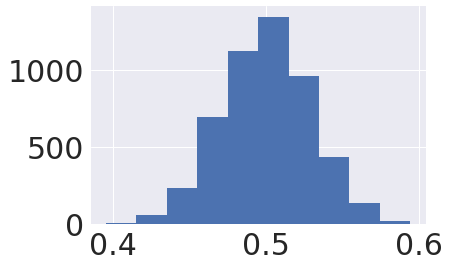

In [18]:
l = []
N = 100
n = 5000
for _ in range(n):
    x = np.random.rand(N)
    l.append(np.sum(x) / N)

print('mean simple', np.mean(x))
print('var simple', np.var(x))
print('mean simple ', np.mean(l))
print('var simple', np.var(l))
plt.hist(l);

What happens if you have a the sum of normal sampling mutiplied by a Bernoulli distribution

mean simple 0.355064682383
var simple 0.105550605818
mean aggregate 0.400289270229
var aggregate 0.0010617464539


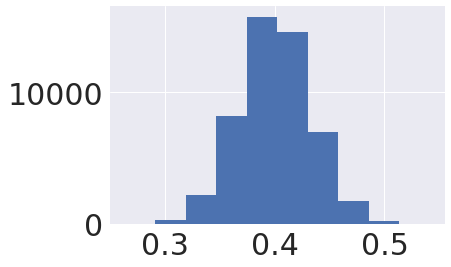

In [19]:
l = []
N = 100
p = 0.8
n = 50000
for _ in range(n):
    x = np.random.rand(N)
    y = np.random.binomial(n=1, p=p, size=N)
    z = x * y 
    l.append(np.sum(z) / N)


print('mean simple', np.mean(z))
print('var simple', np.var(z))
print('mean aggregate', np.mean(l))
print('var aggregate', np.var(l))
plt.hist(l);

## Sparseness for simple sequence completition
First let's be sure that the normal appraoch does not work actually.

In [20]:
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 35.0   # Input - C3 connection
b = 35.0   # Input - C1 connection
Kr = 0.26  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = Kr  # Inhibition from C3 to C1
p =  0.4  # Sparness parameter
p2 = 0.4
w0 = 0.36

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 5.0

# Training parameters
sequence = [0, 1, 2, 3, 4, 5, 6, 7]
# sequence = [0, 1, 2]
epsilon = 0.1
training_time = 200
verbose = False


nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, p2=p2, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=True, w0=w0)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence, verbose=verbose, save_quantities=True)

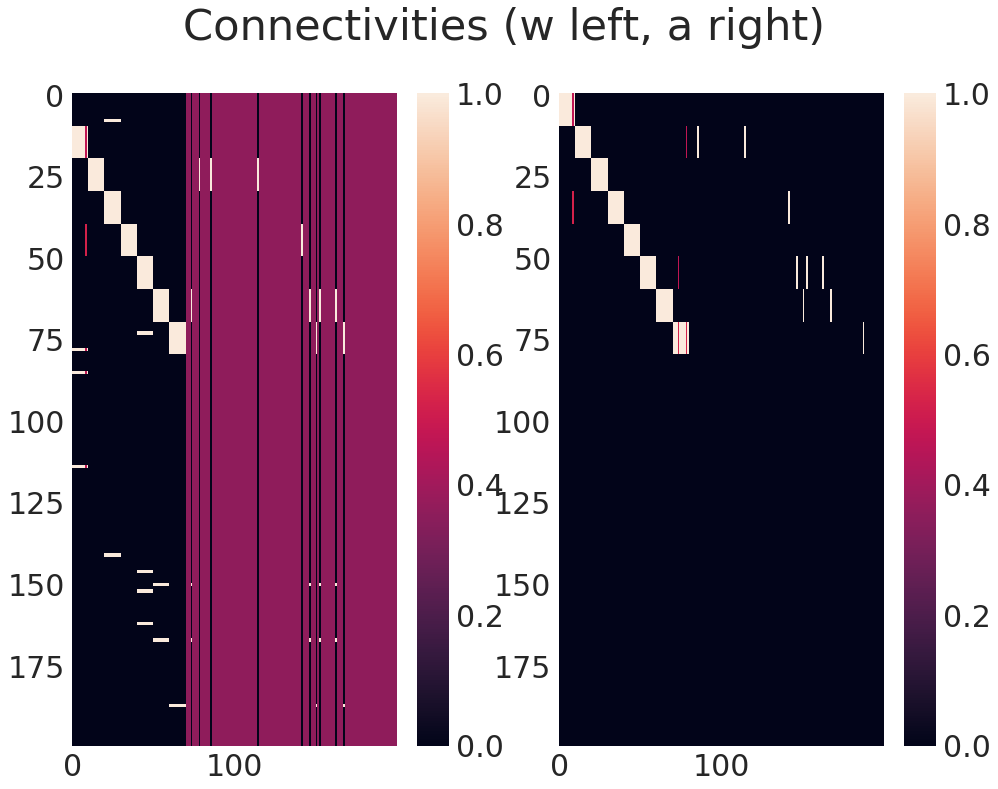

In [21]:
nn.plot_weight_matrices()

In [22]:
success, z = nn.test_recall(sequence=sequence)
print('success', success)

success 12.5


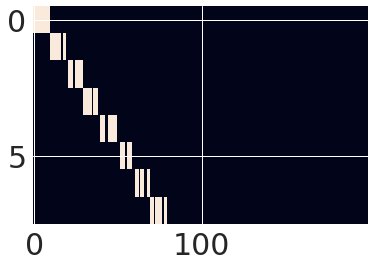

In [23]:
plt.imshow(z, aspect='auto')

In [24]:
z = nn.recall(cue=0, recall_time=2, verbose=True)

------
0
----
s
10.0
m
0
C3 layer
recurrent excitation
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
---- inhibition
0.0
excitation input
[ 35.  35.  35.  35.  35.  35.  35.  35.  35.  35.   0.   0.   0.   0.   0.
   0.   0.   0.   0

recurrent excitation
[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.5474  0.2474  0.3474  0.2     0.4     0.3474  0.2474  0.1     0.4474
  0.6     0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.0526  0.      0.      0.      0.0526  0.      0.      0.
  0.0526  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.7474  0.      0.      0.      0.      0.      0.      0.7474  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.8     0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0

#### How the space looks like

In [10]:
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 35.0   # Input - C3 connection
b = 35.0   # Input - C1 connection
Kr = 0.22  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = 0.22  # Inhibition from C3 to C1
p =  0.4  # Sparness parameter
p2 = 0.4
w0 = 0.36

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 5.0

# Training parameters
sequence = [0, 1, 2, 3, 4, 5, 6, 7]
# sequence = [0, 1, 2]
epsilon = 0.1
training_time = 200
verbose = False


nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, p2=p2, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=True, w0=w0)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence, verbose=verbose, save_quantities=True)

In [11]:
Kr_vector = np.arange(0.0, 1.0, 0.05)
norm_history = []
success_history = []
activity_history = []

Kr = 0.65

for Kr in Kr_vector:
    Cr = Kr
    nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)
    
    nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)
    
    # Copy the first neuron
    n_non_hidden = len(sequence) * nn.neurons_per_pattern
    w_initial = np.copy(nn.w)
    w_initial[:, :n_non_hidden] = 0.0
    
    # Train and test the network
    quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                                  sequence=sequence, verbose=verbose, save_quantities=True)
    success, _ = nn.test_recall(sequence)
    
    # Store mean activities in the recurrent layer
    z_r_end = np.mean(quantities['z_r'], axis=0)
    explicit_nn_length = nn.neurons_per_pattern * (sequence[-1] + 1)
    z_r_non_hidden = z_r_end[:explicit_nn_length]
    z_hidden = z_r_end[explicit_nn_length:]
    
    w_final = np.copy(nn.w)
    w_final[:, :n_non_hidden] = 0.0
    norm = np.linalg.norm(w_final - w_initial)
    cos_sim = np.dot(w_initial.flatten(), w_final.flatten()) / (np.linalg.norm(w_final) * np.linalg.norm(w_initial))
    
    success_history.append(success / 100.0)
    norm_history.append(1.0 - cos_sim)
    activity_history.append(z_hidden.mean())

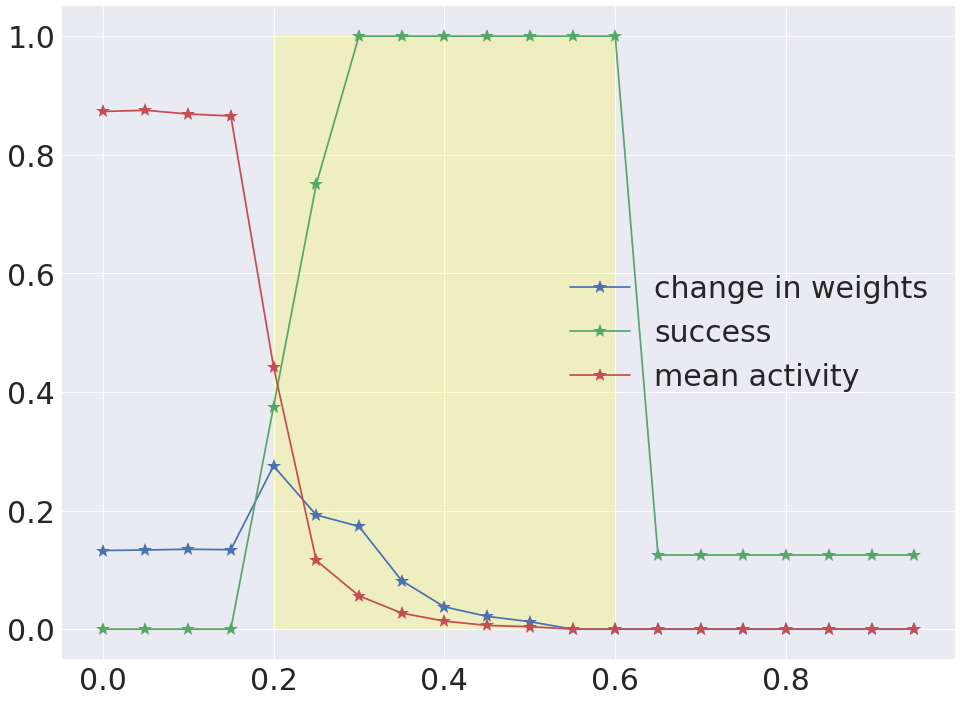

In [12]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Kr_vector, norm_history, '*-', markersize=15, label='change in weights');
ax.plot(Kr_vector, success_history, '*-', markersize=15, label='success')
ax.plot(Kr_vector, activity_history, '*-', markersize=15, label='mean activity')

ax.fill_between(np.arange(0.2, 0.70, 0.1), 0.0, 1.0, alpha=0.2, facecolor='yellow', interpolate=False)

ax.legend();

#### Let's see if we can disambiguate

In [69]:
n_input = 200  # Inputs size
n_recurrent = 200  # C3 size
v = 35.0   # Input - C3 connection
b = 35.0   # Input - C1 connection
Kr = 0.20  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 0.0  # Inhibition from the input to C1
Cr = Kr  # Inhibition from C3 to C1
p =  0.4  # Sparness parameter
p2 = 1.0
w0 = 0.36

# Dynamical parameters
theta = 0.0
phi = 0


# Training parameters
training_time = 100
epsilon = 0.1

# Instantiate the network
nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, p2=p2, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=True, w0=w0)

# Build the patterns
number_of_patterns = 20
sparsity = 5.0
nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

# Training
sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
epsilon = 0.1
training_time = 200
pre_synaptic_rule = True

nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, 
                 pre_synaptic_rule=pre_synaptic_rule)
nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, 
                 pre_synaptic_rule=pre_synaptic_rule);

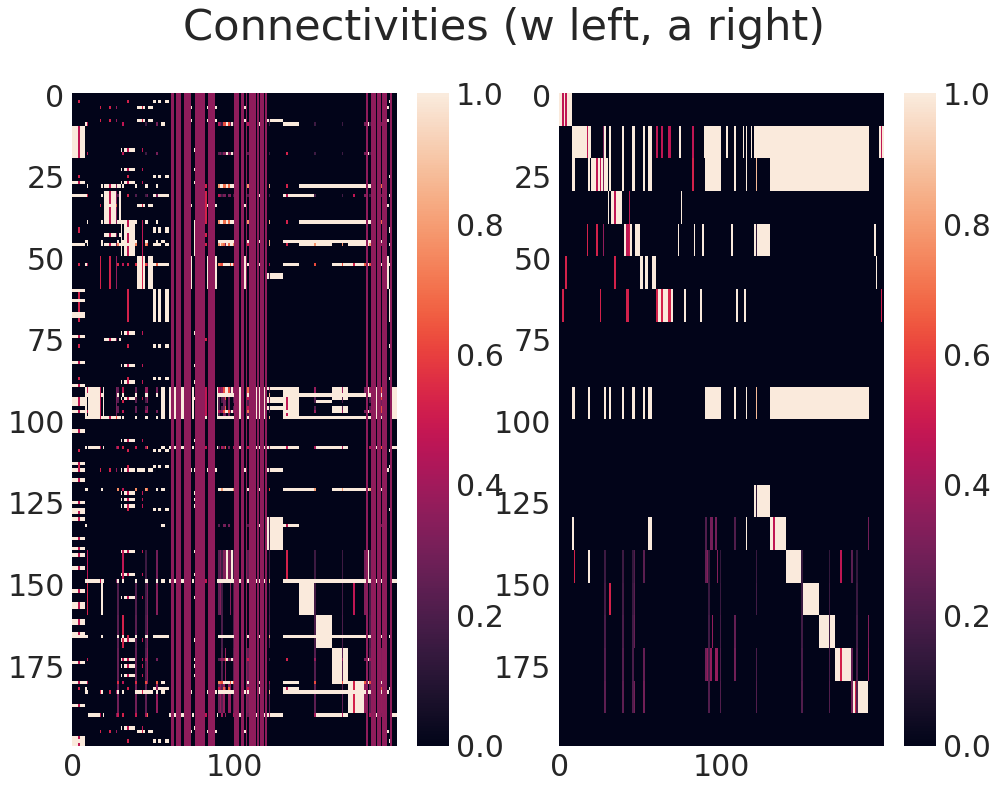

In [70]:
nn.plot_weight_matrices()

In [71]:
sequences = [sequence1, sequence2]

right_scores = []
wrong_scores = []

for sequence in sequences:
    success, z = nn.test_recall(sequence)
    goal_pattern = nn.patterns_dictionary[sequence[-1]]

    wrong_indexes = np.where(goal_pattern == 0)[0]
    right_indexes = np.where(goal_pattern == 1)[0]

    right_score =  z[-1][right_indexes].sum()
    wrong_score = z[-1][wrong_indexes].sum()
    
    right_scores.append(right_score)
    wrong_scores.append(wrong_score)
    
print('right scores', right_scores)
print('wrong scores', wrong_scores)

right scores [0.0, 10.0]
wrong scores [40.0, 30.0]


In [72]:
right_scores_history = []
wrong_scores_history = []

p2 = 1.0
dt = 0.05
Kr_vector = np.arange(0.1, 0.5 + dt, dt)

for Kr in Kr_vector:
    Cr = Kr
    # Instantiate the network
    nn = MinaNetwork(n_input=n_input, n_recurrent=n_recurrent, p=p, p2=p2, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                     theta=theta, phi=phi, uniform_w=True, w0=w0)

    # Build the patterns
    number_of_patterns = 20
    sparsity = 5.0
    nn.build_patterns_dictionary(number_of_patterns=number_of_patterns, sparsity=sparsity)

    # Training
    sequence1 = [ 0,  1,  9,  2,  3,  4,  5,  6]
    sequence2 = [12, 13, 9, 14, 15, 16, 17, 18]
    epsilon = 0.1
    training_time = 200
    pre_synaptic_rule = True

    nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence1, pre_synaptic_rule=pre_synaptic_rule)
    nn.train_network(epsilon=epsilon, training_time=training_time, sequence=sequence2, pre_synaptic_rule=pre_synaptic_rule)
    
    sequences = [sequence1, sequence2]

    right_scores = []
    wrong_scores = []

    for sequence in sequences:
        success, z = nn.test_recall(sequence)
        goal_pattern = nn.patterns_dictionary[sequence[-1]]

        wrong_indexes = np.where(goal_pattern == 0)[0]
        right_indexes = np.where(goal_pattern == 1)[0]

        right_score =  z[-1][right_indexes].sum() 
        wrong_score = z[-1][wrong_indexes].sum()
        right_scores.append(right_score)
        wrong_scores.append(wrong_score)
    
    right_scores_history.append(right_scores)
    wrong_scores_history.append(wrong_scores)


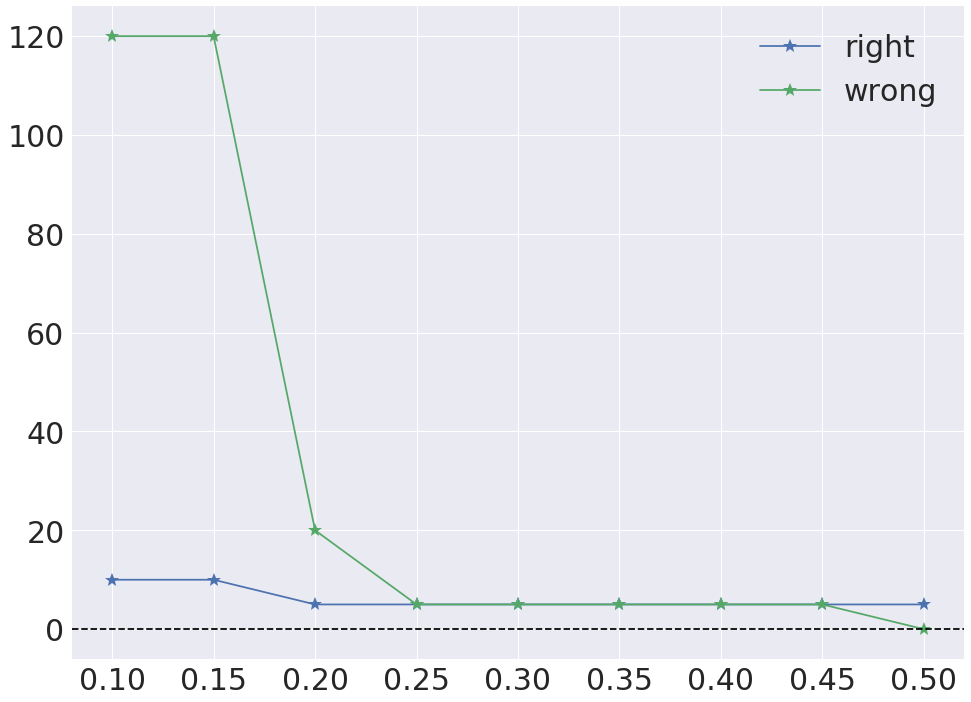

In [73]:
x = np.array(right_scores_history) 
y = np.array(wrong_scores_history)

right_results = np.mean(x, axis=1)
wrong_results = np.mean(y, axis=1)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(Kr_vector, right_results, '*-', markersize=15, label='right')
ax.plot(Kr_vector, wrong_results, '*-', markersize=15, label='wrong')

ax.axhline(0, color='black', linestyle='--')

# ax.set_ylim([-0.1, 1.1])
ax.legend();